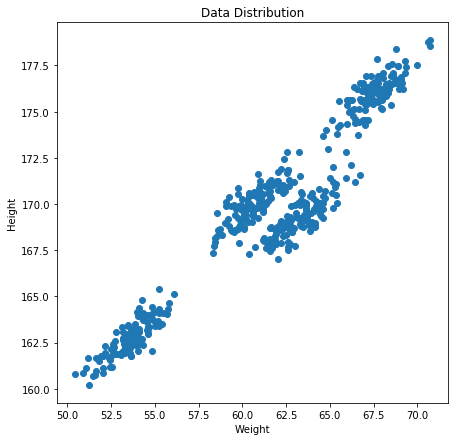

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Clustering_gmm.csv')

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"], data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()
data

/home/hatake/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


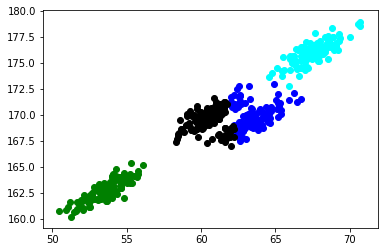

In [9]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.colums = ['Weight', 'Height', 'cluster']

#plotting results
color = ['blue', 'green', 'cyan', 'black']
for k in range(0, 4):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Weight"], data["Height"], c=color[k])
plt.show()

In [10]:
import pandas as pd
from sklearn.mixture import GaussianMixture
data = pd.read_csv('Clustering_gmm.csv')
#training gaussian mixture model
gmm = GaussianMixture(n_components=4)
gmm.fit(data)



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

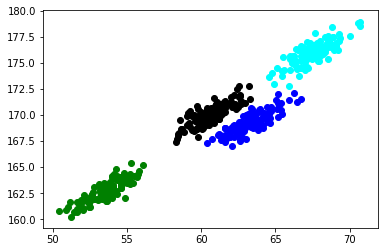

In [11]:
#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color = ['blue', 'green', 'cyan', 'black']
for k in range(0, 4):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Weight"], data["Height"], c=color[k])
plt.show()